In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD

# Ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

In [4]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]

5

In [9]:
X_test.shape

(10000, 28, 28)

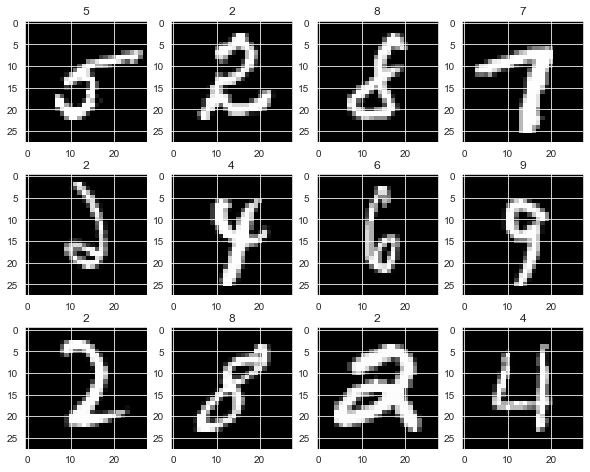

In [10]:
num_classes=10                                      # Number of Classes
categories=np.unique(y_train)                       # Obtaing the unique classes from y_train
rows = 3                                                                        # Defining number of rows=3
cols = 4                                                                        # Defining number of columns=4
fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)           # Adding subplots with 3 rows and 4 columns
        ax.imshow(X_train[random_index, :], cmap=plt.get_cmap('gray'))  # Plotting the image using cmap=gray
        ax.set_title(categories[y_train[random_index]])
plt.show()

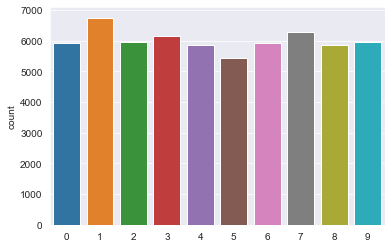

In [11]:
# Plot distribution of each category
count_plot = sns.countplot(y_train)

In [12]:
# Reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [13]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [14]:
# to_categorical() function is also explained in the Neural Networks Module

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [15]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [16]:
# Intializing a sequential model
ann_model = Sequential()
# Flatten the input to add dense convolutional layers on top of it
ann_model.add(Flatten(input_shape=(28, 28)))
# Adding a sequential layer with 100 neurons
ann_model.add(Dense(100, activation='relu'))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
ann_model.add(Dense(10, activation='softmax'))
# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)
# Compile model
ann_model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
# Generating the summary of the model
ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = ann_model.fit(
    X_train_normalized, y_train_encoded,
    epochs=15,
    validation_split=0.1,
    shuffle=True,
    batch_size=64,
    verbose=2
)

Epoch 1/15
844/844 - 1s - loss: 0.4176 - accuracy: 0.8819 - val_loss: 0.2073 - val_accuracy: 0.9413
Epoch 2/15
844/844 - 1s - loss: 0.2185 - accuracy: 0.9378 - val_loss: 0.1574 - val_accuracy: 0.9577
Epoch 3/15
844/844 - 1s - loss: 0.1653 - accuracy: 0.9530 - val_loss: 0.1270 - val_accuracy: 0.9653
Epoch 4/15
844/844 - 1s - loss: 0.1351 - accuracy: 0.9622 - val_loss: 0.1139 - val_accuracy: 0.9667
Epoch 5/15
844/844 - 1s - loss: 0.1146 - accuracy: 0.9670 - val_loss: 0.1029 - val_accuracy: 0.9702
Epoch 6/15
844/844 - 1s - loss: 0.0996 - accuracy: 0.9720 - val_loss: 0.0937 - val_accuracy: 0.9730
Epoch 7/15
844/844 - 1s - loss: 0.0880 - accuracy: 0.9751 - val_loss: 0.0876 - val_accuracy: 0.9763
Epoch 8/15
844/844 - 1s - loss: 0.0785 - accuracy: 0.9775 - val_loss: 0.0857 - val_accuracy: 0.9767
Epoch 9/15
844/844 - 1s - loss: 0.0705 - accuracy: 0.9801 - val_loss: 0.0837 - val_accuracy: 0.9765
Epoch 10/15
844/844 - 1s - loss: 0.0647 - accuracy: 0.9815 - val_loss: 0.0805 - val_accuracy: 0.9767

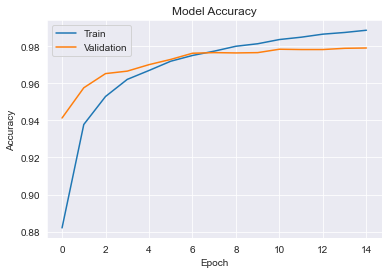

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
accuracy = ann_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

313/313 - 0s - loss: 0.0775 - accuracy: 0.9762


In [20]:
# Here we would get the output as probablities for each category
y_pred=ann_model.predict(X_test_normalized)

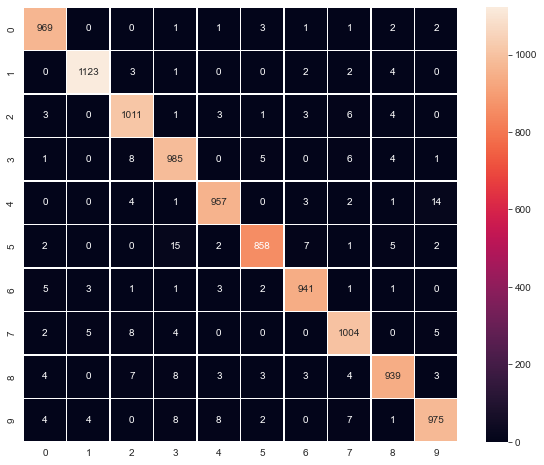

In [21]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Building the CNN**

In [22]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [23]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [24]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(10, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [25]:
history_1 = model.fit(
    X_train_normalized, y_train_encoded,
    epochs=15,
    validation_split=0.1,
    shuffle=True,
    batch_size=64,
    verbose=2
)

Epoch 1/15
844/844 - 30s - loss: 0.3489 - accuracy: 0.8848 - val_loss: 0.0809 - val_accuracy: 0.9748
Epoch 2/15
844/844 - 28s - loss: 0.0778 - accuracy: 0.9761 - val_loss: 0.0586 - val_accuracy: 0.9820
Epoch 3/15
844/844 - 28s - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.0444 - val_accuracy: 0.9868
Epoch 4/15
844/844 - 28s - loss: 0.0422 - accuracy: 0.9865 - val_loss: 0.0462 - val_accuracy: 0.9868
Epoch 5/15
844/844 - 27s - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0347 - val_accuracy: 0.9898
Epoch 6/15
844/844 - 28s - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.0387 - val_accuracy: 0.9898
Epoch 7/15
844/844 - 30s - loss: 0.0262 - accuracy: 0.9911 - val_loss: 0.0383 - val_accuracy: 0.9890
Epoch 8/15
844/844 - 30s - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.0341 - val_accuracy: 0.9905
Epoch 9/15
844/844 - 30s - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0337 - val_accuracy: 0.9915
Epoch 10/15
844/844 - 30s - loss: 0.0168 - accuracy: 0.9943 - val_loss: 0.0339 - val_accura

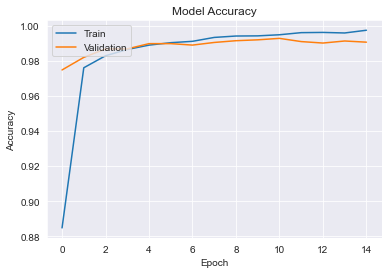

In [26]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

313/313 - 2s - loss: 0.0360 - accuracy: 0.9903


In [28]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

In [29]:
y_pred

array([[2.8140907e-19, 4.0602100e-13, 1.6737048e-11, ..., 1.0000000e+00,
        9.1111840e-16, 4.7642364e-13],
       [6.5397146e-11, 8.0824702e-10, 1.0000000e+00, ..., 5.1837805e-11,
        1.9749160e-13, 2.8106957e-15],
       [1.4008207e-09, 9.9999428e-01, 4.6310923e-08, ..., 5.0722565e-06,
        2.4440956e-07, 9.2605461e-08],
       ...,
       [6.5791299e-17, 4.2873916e-12, 9.1406703e-16, ..., 8.6392102e-11,
        1.2644792e-09, 7.4930312e-11],
       [4.3669099e-09, 1.6842388e-17, 5.2628330e-15, ..., 4.0064889e-14,
        2.0854584e-05, 8.0553181e-15],
       [2.3701521e-13, 5.5259755e-14, 9.4457688e-12, ..., 3.5500356e-20,
        6.0964025e-12, 9.4301328e-18]], dtype=float32)

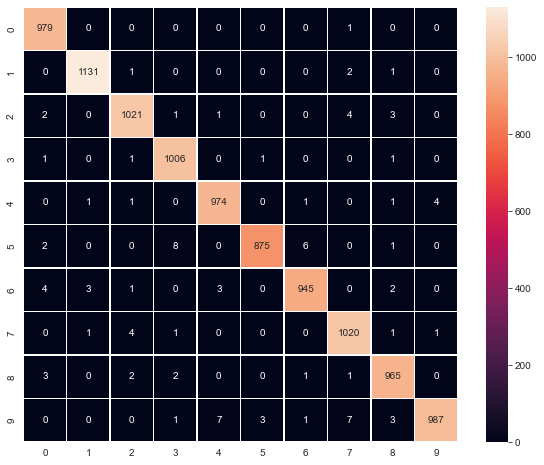

In [30]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()